# Kaggle Intro ML: Units 4, 5, 6

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
from matplotlib import pylab as plt
figsize=[8,5]
plt.rcParams['figure.figsize'] = figsize
plt.rcParams['figure.dpi'] = 100
plt.rcParams['agg.path.chunksize'] = 10000
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment',None)
from IPython.display import Image

In [2]:
# Units 4 5 and 6 from Kaggle Learn Intro ML Course
    # 4) Model Validation
    # 5) Overfitting and Underfitting
    # 6) Random Forest

In [3]:
# Dataset: Iowa Home Prices.
# Objective: Predict home sales prices in Ames Iowa

In [4]:
# Sections 1-3: basic data exploration and build your first Decision Tree regression model:

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Path of the file to read.
iowa_file_path = './data/iowa_homes/train.csv'

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Specify Model
iowa_model = DecisionTreeRegressor()
# Fit Model
iowa_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# 4) Model Validation

## What is Model Validation?

In [6]:
# "Predictive Accuracy"

# Let's see how well the model performs. 

In [7]:
# Inspection:
prices_dt0 = pd.DataFrame({'observed':y,'predicted':iowa_model.predict(X)},index=y.index)
prices_dt0

,observed,predicted
0,208500,208500.0
1,181500,181500.0
2,223500,223500.0
3,140000,140000.0
4,250000,250000.0
...,...,...
1455,175000,175000.0
1456,210000,210000.0
1457,266500,266500.0
1458,142125,142125.0


In [8]:
# Accuracy?
print('Incorrect predictions: %d'%(prices_dt0.observed!=prices_dt0.predicted).sum())
print('Correct predictions: %d'%(prices_dt0.observed==prices_dt0.predicted).sum())

Incorrect predictions: 24
Correct predictions: 1436


Accuracy is NOT a good metric for regression problems where the target is a continuous number.

Instead, shouldn't our model quantify how much its price predictions are missing by?

In [9]:
# We want a metric that rewards "close enough" answers while penalizing large errors
# Continuity

# MAE (yes)
# MSE
    # nice math (unbiased estimator of the mean)
    # can over-weight outliers
    # slightly more difficult to interpret than MAE (hence RMSE)
    # actually our model is already using MSE internally (criterion='mse') to optimize tree construction

In [10]:
# mean_absolute_error:
from sklearn.metrics import mean_absolute_error

In [11]:
print(mean_absolute_error(prices_dt0.observed,prices_dt0.predicted))

62.35433789954339


In [12]:
# Mean Absolute Error is $62

## The Problem with "In-Sample" Scores

In [13]:
# Example: Green doors

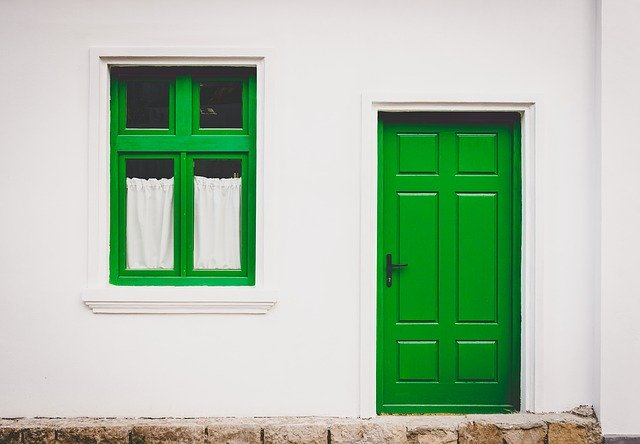

In [14]:
Image('house-768707_640.jpg')

In [15]:
# But the model's practical value comes from its ability to predict home values for data it hasn't seen yet.
# Therefore we also need to assess model performance on data it hasn't seen yet 

In [16]:
# train_test_split:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [19]:
prices_train_dt0 = pd.DataFrame({'observed':train_y,'predicted':iowa_model.predict(train_X)},index=train_y.index)
mae_dt0_train = mean_absolute_error(prices_train_dt0.observed,prices_train_dt0.predicted)
mae_dt0_train

61.85692541856926

In [20]:
prices_val_dt0 = pd.DataFrame({'observed':val_y,'predicted':iowa_model.predict(val_X)},index=val_y.index)
mae_dt0_val = mean_absolute_error(prices_val_dt0.observed,prices_val_dt0.predicted)
mae_dt0_val

29652.931506849316

Now we have a very different picture. Our model errs on out-of-sample homes by an average of $30K!

# 5) Underfitting and Overfitting

Huge difference between In-Sample and Out-Of-Sample Performance ===> Overfitting!

Why are we doing so well on train set, and why does that performance not extend to val set?

## Deep Dive 1: Tree Overfitting

In [21]:
# Accuracy may not be a useful performance metric for regression models
    # but it does provide a useful insight into THIS model
print('Training Set:')
print('    Incorrect predictions: %d'%(prices_train_dt0.observed!=prices_train_dt0.predicted).sum())
print('    Correct predictions: %d'%(prices_train_dt0.observed==prices_train_dt0.predicted).sum())
print('    Accuracy: %.3f' % ((prices_train_dt0.observed==prices_train_dt0.predicted).sum()/len(prices_train_dt0)))
print()
print('Validation Set:')
print('    Incorrect predictions: %d'%(prices_val_dt0.observed!=prices_val_dt0.predicted).sum())
print('    Correct predictions: %d'%(prices_val_dt0.observed==prices_val_dt0.predicted).sum())
print('    Accuracy: %.3f' % ((prices_val_dt0.observed==prices_val_dt0.predicted).sum()/len(prices_val_dt0)))

Training Set:
    Incorrect predictions: 16
    Correct predictions: 1079
    Accuracy: 0.985

Validation Set:
    Incorrect predictions: 364
    Correct predictions: 1
    Accuracy: 0.003


There are 16 training points with inexact predictions. Let's look at them:

In [22]:
missed_preds_train = prices_train_dt0.observed!=prices_train_dt0.predicted
pd.concat([train_X[missed_preds_train],prices_train_dt0[missed_preds_train]],axis=1).sort_values('predicted')

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,observed,predicted
363,1680,1972,483,504,1,2,5,118000,106250.000000
232,1680,1972,483,504,1,2,5,94500,106250.000000
193,2522,2004,970,739,2,3,7,130000,132500.000000
145,2522,2004,970,739,2,3,7,130000,132500.000000
1088,2522,2004,970,739,2,3,7,137500,132500.000000
550,4043,1977,1069,0,2,2,4,140000,133750.000000
1421,4043,1977,1069,0,2,2,4,127500,133750.000000
1422,4435,2003,848,0,1,1,3,136500,134000.000000
850,4435,2003,848,0,1,1,3,131500,134000.000000
593,4435,2003,848,0,1,1,4,140000,142000.000000


In [23]:
# This model only makes errors when we have multiple samples with identical feature vectors but distinct prices.
    # In these cases, our model returns the mean price of these samples (due to MSE criterion!)

Identical feature vectors probably indicate that the homes are part of the same development project, same builder, etc.
    
But there are still many exogenous vars not included in our feature set:
1. sale date
2. financial conditions of sale
3. property condition



In [24]:
# For the other 1079 unique feature vectors in the training set, our model is functioning just like a lookup table!

# Fully grown tree
# Highly unstable model!
# analogy to KNN k=1

In [25]:
# So... is this model even useful at all for unseen data?

# Actually yes

# What would happen if we had no features at all?
    # The best prediction we could make (to minimize MAE): we should choose the median of our dataset
train_median = prices_train_dt0.observed.median()
print(train_median)
print((prices_train_dt0.observed-train_median).abs().mean())
print((prices_val_dt0.observed-train_median).abs().mean())

# Our model does reduce validation MAE by roughly 50% over the no-model case.

164900.0
55503.65844748858
55690.55342465753


In [26]:
# But clearly we can do better.

# Let's dive in and inspect the tree to see what decisions are made.

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [28]:
pd.Series(iowa_model.feature_importances_,train_X.columns)

LotArea         0.083567
YearBuilt       0.358917
1stFlrSF        0.351534
2ndFlrSF        0.150718
FullBath        0.001702
BedroomAbvGr    0.019507
TotRmsAbvGrd    0.034055
dtype: float64

In [29]:
iowa_model.tree_

In [30]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

In [31]:
from sklearn.tree import _tree
help(_tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [32]:
n_nodes = iowa_model.tree_.node_count
children_left = iowa_model.tree_.children_left
children_right = iowa_model.tree_.children_right
feature = iowa_model.tree_.feature
threshold = iowa_model.tree_.threshold

In [33]:
print(n_nodes)             # always odd. Number of leaves exceeds number of non-leaves by 1.
print(children_left)       # Pointers to child nodes. -1 indicates leaf.
print(children_right)      # Pointers to child nodes. -1 indicates leaf.
print(feature)             # For internal nodes, index of feature that was chosen for splitting
print(threshold)           # For internal nodes, threshold value of feature for this split

2139
[ 1  2  3 ... -1 -1 -1]
[1280 1075  890 ...   -1   -1   -1]
[ 1  2  3 ... -2 -2 -2]
[1985.5 1422.5  722.5 ...   -2.    -2.    -2. ]


In [34]:
# leaves:
print(sum((children_right<0)&(children_left<0)))
print(sum(children_right<0))
print(sum(children_left<0))

1070
1070
1070


In [35]:
# 2139 nodes, 1070 of which are leaves. 1069 are internal nodes.
train_X.shape
# There are only 1095 data points! Number of leaves only 25 fewer than number of data points. 

(1095, 7)

In [36]:
# But there were only 7 clusters of identical features shown, which captured the 16 inexact predictions
    # this accounts for 9 less leaves than train samples. 
    # What about the other 16?
    # perhaps there were other points with identical features that also led to identical predictions?

In [37]:
# How many unique feature vectors are there in train_X?
has_duplicate = train_X.duplicated(keep=False)

In [38]:
has_duplicate.sum()
# These are just the same 16 samples that were missed. So we know the other feature vectors are all unique.

16

In [39]:
train_X.drop_duplicates().shape

(1086, 7)

In [40]:
train_leaf = pd.Series(iowa_model.apply(train_X),index=train_X.index,name='Leaf')
len(train_leaf.unique())

1070

In [41]:
# Why would distinct feature vectors be mapped to the same leaf?

In [42]:
# Perhaps certain leaves contain homes with distinct feature vectors but identical prices?
# For a split to occur, need BOTH distinct feature vectors AND distinct prices
    # if prices are distinct but features are not:   our tree would love to split (and reduce MAE), but it can't
    # if features are distinct but prices are not:   our tree could split, but has no reason to (b/c that wouldn't reduce MAE)

In [43]:
train = pd.concat([train_X,prices_train_dt0,train_leaf],axis=1)

In [44]:
train['Multiplicity'] = train.Leaf.map(train.groupby('Leaf')['LotArea'].count())

In [45]:
train_popular_leaf = train[train.Multiplicity>1].sort_values('predicted')
train_popular_leaf

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,observed,predicted,Leaf,Multiplicity
638,8777,1910,796,0,1,2,4,85000,85000.000000,119,2
1013,7200,1910,1022,0,1,2,4,85000,85000.000000,119,2
1404,10410,1915,694,520,1,3,6,105000,105000.000000,259,2
1370,5400,1920,840,534,1,2,6,105000,105000.000000,259,2
232,1680,1972,483,504,1,2,5,94500,106250.000000,39,2
363,1680,1972,483,504,1,2,5,118000,106250.000000,39,2
797,7677,1953,773,0,1,2,4,110000,110000.000000,300,2
978,9450,1954,894,0,1,3,5,110000,110000.000000,300,2
1088,2522,2004,970,739,2,3,7,137500,132500.000000,1371,3
193,2522,2004,970,739,2,3,7,130000,132500.000000,1371,3


In [46]:
train_popular_leaf.shape[0]-len(train_popular_leaf.Leaf.unique())

25

That explains all the leaf nodes containing more than one training sample.

What are the consequences? How might this fully grown tree model lead to poor predictions?

Let's look at the worst validation set prediction our model makes:

In [47]:
val_leaf = pd.Series(iowa_model.apply(val_X),index=val_X.index,name='Leaf')
val = pd.concat([val_X,prices_val_dt0,val_leaf],axis=1)

In [48]:
val['abs_err'] = (val.observed-val.predicted).abs()

In [49]:
val.sort_values('abs_err')

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,observed,predicted,Leaf,abs_err
1252,9858,1968,874,0,1,3,5,130000,130000.0,360,0.0
935,5825,1926,747,0,1,1,5,79900,80000.0,96,100.0
894,7018,1979,1535,0,2,4,8,118858,118964.0,1191,106.0
90,7200,1950,1040,0,1,2,4,109900,109500.0,217,400.0
1113,8923,1953,1008,0,1,2,6,134500,135000.0,405,500.0
...,...,...,...,...,...,...,...,...,...,...,...
1416,11340,1885,1246,1044,2,4,11,122500,265979.0,1041,143479.0
1068,3964,1973,1291,1230,2,5,10,151400,299800.0,989,148400.0
1373,11400,2001,2633,0,2,2,8,466500,305900.0,2061,160600.0
53,50271,1981,1842,0,0,0,5,385000,210000.0,1249,175000.0


In [50]:
# sample 1228 has abs_err $220K !!
# Why?
worst_sample_val = val.sort_values('abs_err').iloc[-1]
worst_id = worst_sample_val.name

In [51]:
worst_id  # row number from original CSV file

1228

In [52]:
# Retrieve Decision Paths:
train_node_indicator = iowa_model.decision_path(train_X)
val_node_indicator = iowa_model.decision_path(val_X)

In [53]:
val_node_indicator

<365x2139 sparse matrix of type '<class 'numpy.int64'>'
	with 5373 stored elements in Compressed Sparse Row format>

In [54]:
val.index

Int64Index([ 258,  267,  288,  649, 1233,  167,  926,  831, 1237,  426,
            ...
              78,  650,  880,  821,   35, 1017,  534, 1334, 1369,  628],
           dtype='int64', length=365)

In [55]:
worst_id_loc = val.index.get_loc(worst_id)
worst_id_loc  # row number in shuffled val dataframe

137

In [56]:
val_node_indicator[worst_id_loc]    # this sample traces a path of 10 nodes

<1x2139 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [57]:
print((val_node_indicator.indptr[worst_id_loc],val_node_indicator.indptr[1+worst_id_loc])) 
print(val_node_indicator[worst_id_loc]) # 10 branches in this path, to reach node

(2028, 2038)
  (0, 0)	1
  (0, 1280)	1
  (0, 2002)	1
  (0, 2003)	1
  (0, 2004)	1
  (0, 2005)	1
  (0, 2006)	1
  (0, 2010)	1
  (0, 2011)	1
  (0, 2012)	1


Text(0.5, 1.0, 'Histogram of Path Lengths, Validation Set')

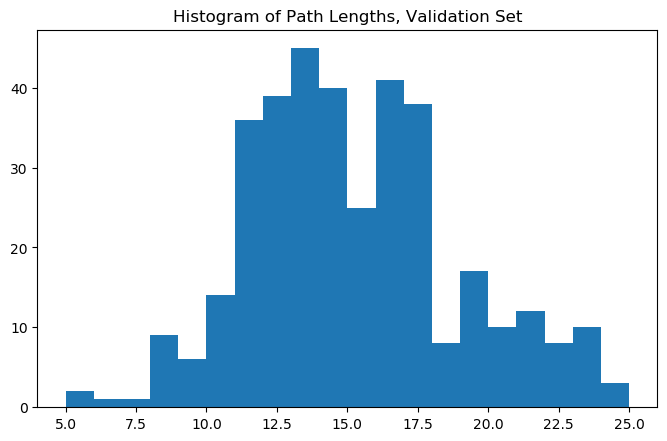

In [58]:
plt.hist(np.diff(val_node_indicator.indptr),bins=range(5,26))
plt.title('Histogram of Path Lengths, Validation Set')

In [59]:
print((val_node_indicator.indptr[worst_id_loc],val_node_indicator.indptr[1+worst_id_loc])) 
print(val_node_indicator[worst_id_loc]) # 10 branches in this path, to reach node

(2028, 2038)
  (0, 0)	1
  (0, 1280)	1
  (0, 2002)	1
  (0, 2003)	1
  (0, 2004)	1
  (0, 2005)	1
  (0, 2006)	1
  (0, 2010)	1
  (0, 2011)	1
  (0, 2012)	1


In [61]:
worst_path = val_node_indicator.indices[val_node_indicator.indptr[worst_id_loc]:val_node_indicator.indptr[1+worst_id_loc]]
print(worst_path) # path

[   0 1280 2002 2003 2004 2005 2006 2010 2011 2012]


In [62]:
# Decisions:
for node_id in worst_path:
    if val.Leaf.iloc[worst_id_loc] == node_id:
        continue

    if (val_X.iloc[worst_id_loc, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (val[%s, %s] (%s = %s) %s %s)"
          % (node_id,
             worst_id_loc,
             feature[node_id],
             val_X.columns[feature[node_id]],
             val_X.iloc[worst_id_loc, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

decision id node 0 : (val[137, 1] (YearBuilt = 2008) > 1985.5)
decision id node 1280 : (val[137, 2] (1stFlrSF = 1702) > 1685.0)
decision id node 2002 : (val[137, 0] (LotArea = 8769) <= 12169.0)
decision id node 2003 : (val[137, 1] (YearBuilt = 2008) <= 2008.5)
decision id node 2004 : (val[137, 2] (1stFlrSF = 1702) <= 1979.5)
decision id node 2005 : (val[137, 2] (1stFlrSF = 1702) <= 1932.0)
decision id node 2006 : (val[137, 0] (LotArea = 8769) > 8460.0)
decision id node 2010 : (val[137, 0] (LotArea = 8769) <= 10035.0)
decision id node 2011 : (val[137, 5] (BedroomAbvGr = 1) <= 2.5)


In [63]:
# How sensitive is our tree to small input changes?

In [64]:
train.YearBuilt.min()

1872

In [66]:
yearsArray = list(range(train.YearBuilt.min(),1+train.YearBuilt.max()))
val_X_worst_sample_altered_year = val_X.iloc[137].copy().to_frame().T.reindex([worst_id]*len(yearsArray))
val_X_worst_sample_altered_year['YearBuilt'] = yearsArray
val_X_worst_sample_altered_year['predicted'] = iowa_model.predict(val_X_worst_sample_altered_year)
val_X_worst_sample_altered_year.tail()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,predicted
1228,8769,2006,1702,0,1,1,7,147000.0
1228,8769,2007,1702,0,1,1,7,147000.0
1228,8769,2008,1702,0,1,1,7,147000.0
1228,8769,2009,1702,0,1,1,7,394432.0
1228,8769,2010,1702,0,1,1,7,394432.0


Text(0, 0.5, 'Predicted Price')

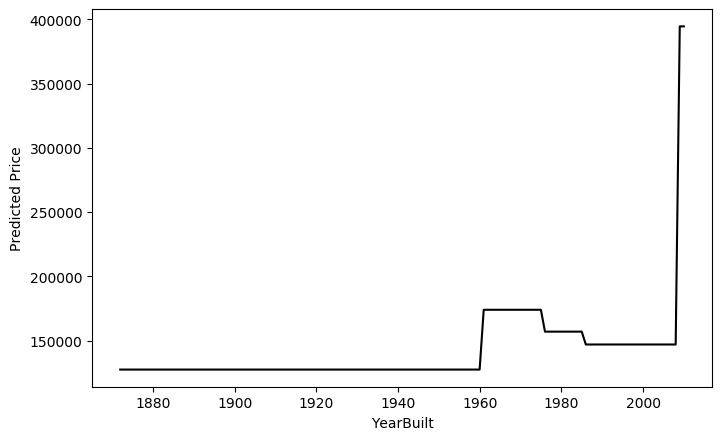

In [69]:
plt.plot(yearsArray,val_X_worst_sample_altered_year.predicted,'k-')
plt.xlabel('YearBuilt')
plt.ylabel('Predicted Price')

## Experimenting with Different Models

Intuition: these trees are too specific. Very sensitive to individual samples from training data!

Maybe we should build a tree with fewer branches? Can we improve generalization if we build a shorter tree?

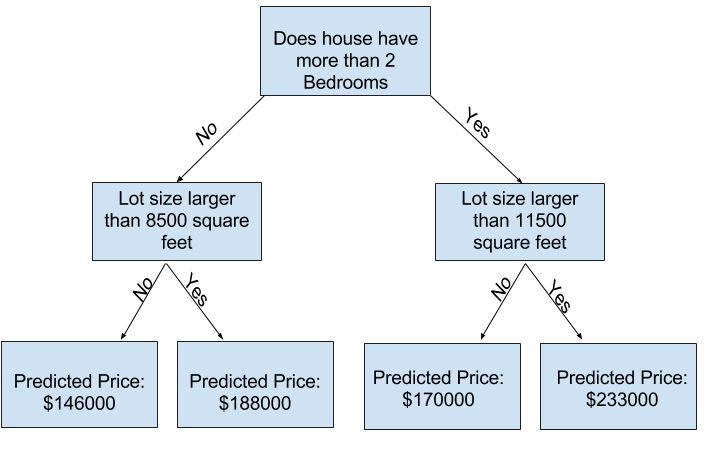

In [70]:
Image('kaggle_DT_example.png')

In [71]:
for node_id in worst_path:
    print('Node %d: Num Training Samples: %d/%d, Val Samples: %d/%d' % \
        (node_id,
             train_node_indicator[:,node_id].sum(),
             len(train),
             val_node_indicator[:,node_id].sum()
             ,len(val)))
    print('                                                           SPLIT: (%s = %s) %s %s' % \
        (val_X.columns[feature[node_id]],
             val_X.iloc[worst_id_loc, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

Node 0: Num Training Samples: 1095/1095, Val Samples: 365/365
                                                           SPLIT: (YearBuilt = 2008) <= 1985.5
Node 1280: Num Training Samples: 442/1095, Val Samples: 131/365
                                                           SPLIT: (1stFlrSF = 1702) <= 1685.0
Node 2002: Num Training Samples: 70/1095, Val Samples: 17/365
                                                           SPLIT: (LotArea = 8769) <= 12169.0
Node 2003: Num Training Samples: 33/1095, Val Samples: 8/365
                                                           SPLIT: (YearBuilt = 2008) <= 2008.5
Node 2004: Num Training Samples: 31/1095, Val Samples: 7/365
                                                           SPLIT: (1stFlrSF = 1702) <= 1979.5
Node 2005: Num Training Samples: 26/1095, Val Samples: 6/365
                                                           SPLIT: (1stFlrSF = 1702) <= 1932.0
Node 2006: Num Training Samples: 25/1095, Val Samples: 6/365
  

When we divide the houses so that each leaf contains very few samples, these leaves will make predictions that are quite close to those training values, but they may make very unreliable predictions for new data (because each prediction was based on only a few houses).

This is a phenomenon called OVERFITTING, where a model matches the training data almost perfectly, but does poorly in validation and other new data.

On the flip side, if we make our tree very short, it doesn't divide up the houses into very many distinct groups, and its predictions will not be over-sensitive to a few data points. But if it is too short, it may be unable to learn important patterns and trends in the data. For instance, the tree drawn at the beginning of this section fails to consider the age of a home or its square footage at all, yet we expect the true price will depend on those features.

This is a phenomenon called UNDERFITTING. An underfit model will do poorly even on the training data, and it will perform poorly on validation data for the same reason.

A typical machine learning algorithm will exhibit the following performance profile, where the X-axis could be any hyperparameter that increases model complexity and flexibility:

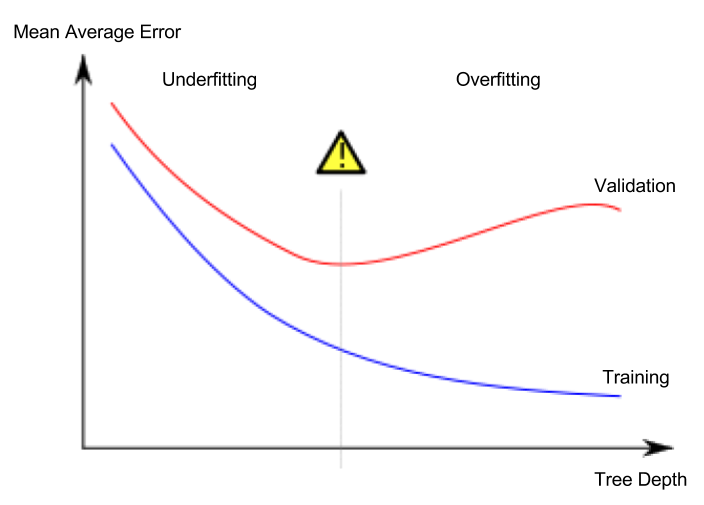

In [72]:
Image('Train_vs_Val.png')

In [73]:
# Curve-fit example illustrating the same concept???

## Example

How might we solve our overfitting problem with the Iowa housing prices?

In [74]:
# Decision Tree Hyperparameters and Default values:

# DecisionTreeRegressor() uses these default hyperparameter values:

# max_depth=None
# min_samples_split=2
# min_samples_leaf=1
# min_weight_fraction_leaf=0.0
# max_leaf_nodes=None
# min_impurity_decrease=0.0
# min_impurity_split=None
# ccp_alpha=0.0

All these defaults lead to a fully grown tree.

Number of Leaves will equal Number of Samples (if X and y contain no collisions)

We'll choose max_leaf_nodes as a hyperparameter to vary the tree complexity.

How will max_leaf_nodes affect validation performance?

In [75]:
# Helper Function:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [76]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

# Write loop to find the ideal tree size from candidate_max_leaf_nodes
mae_models = pd.Series([get_mae(mln,train_X,val_X,train_y,val_y) for mln in candidate_max_leaf_nodes],\
                       index=candidate_max_leaf_nodes)
mae_models

5      35044.512997
25     29016.413192
50     27405.930473
100    27282.508039
250    27893.822226
500    29454.185981
dtype: float64

In [77]:
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = mae_models.idxmin()
print(best_tree_size)

100


## Deep Dive 2: Exhaustive study of max_leaf_nodes

In most circumstances, we proceed as above, choosing a handful of values for a hyperparameter that roughly span the domain of reasonable choices.

In many cases, like max_leaf_nodes, it makes sense to space them evenly over some rescaled version (typically the logarithm)

Why do we choose a subset rather than perform an exhaustive search to optimize?
1. Computation Time !
2. Near the optimum, systematic variance of performance is usually very slow across a wide range of values.
3. Performance variance is dominated by noise in this regime

In [78]:
iowa_models_MLN = [None,None]
train_mae_MLN = [None,(train_y-train_median).abs().mean()]
val_mae_MLN = [None,(val_y-train_median).abs().mean()]  # DecisionTreeRegressor requires max_leaf_nodes >= 2
for max_leaf_nodes in range(2,1+(n_nodes+1)//2):
    if (max_leaf_nodes%100 == 0):
        print(max_leaf_nodes)
    iowa_models_MLN.append(DecisionTreeRegressor(random_state=1,max_leaf_nodes=max_leaf_nodes))
    iowa_models_MLN[-1].fit(train_X,train_y)
    train_mae_MLN.append(mean_absolute_error(train_y,iowa_models_MLN[-1].predict(train_X)))
    val_mae_MLN.append(mean_absolute_error(val_y,iowa_models_MLN[-1].predict(val_X)))

100
200
300
400
500
600
700
800
900
1000


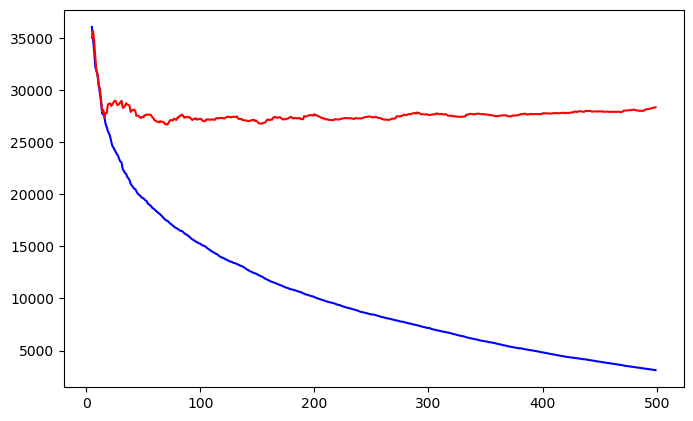

In [79]:
#MLN_plot_range = [2,1+(n_nodes+1)//2]
MLN_plot_range = [5,500]
plt.plot(list(range(MLN_plot_range[0],MLN_plot_range[1])),train_mae_MLN[MLN_plot_range[0]:MLN_plot_range[1]],'b')
plt.plot(list(range(MLN_plot_range[0],MLN_plot_range[1])),val_mae_MLN[MLN_plot_range[0]:MLN_plot_range[1]],'r')

(25000, 32000)

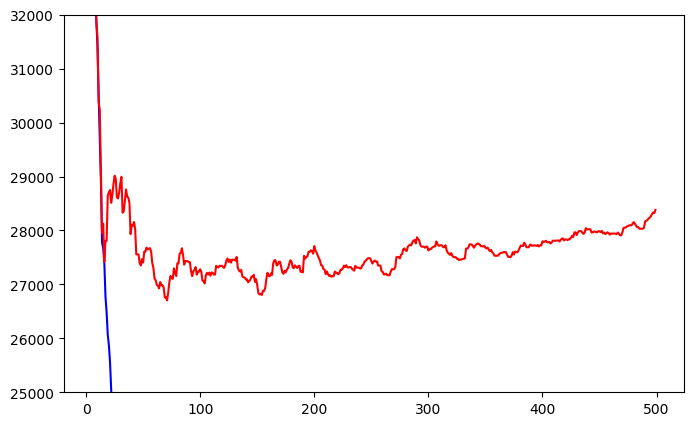

In [80]:
#MLN_plot_range = [2,1+(n_nodes+1)//2]
MLN_plot_range = [5,500]
plt.plot(list(range(MLN_plot_range[0],MLN_plot_range[1])),train_mae_MLN[MLN_plot_range[0]:MLN_plot_range[1]],'b')
plt.plot(list(range(MLN_plot_range[0],MLN_plot_range[1])),val_mae_MLN[MLN_plot_range[0]:MLN_plot_range[1]],'r')
plt.ylim([25000,32000])

In [81]:
# This curve doesn't look especially noisy, it looks auto-correlated. 
# That's only because we're using the same random state.
# So it's merely adding one branch at a time.

# What do we see if we change random_state each time?

In [82]:
iowa_models_MLN = [None,None]
train_mae_MLN = [None,(train_y-train_median).abs().mean()]
val_mae_MLN = [None,(val_y-train_median).abs().mean()]  # DecisionTreeRegressor requires max_leaf_nodes >= 2
for max_leaf_nodes in range(2,1+(n_nodes+1)//2):
    if (max_leaf_nodes%100 == 0):
        print(max_leaf_nodes)
    iowa_models_MLN.append(DecisionTreeRegressor(random_state=max_leaf_nodes,max_leaf_nodes=max_leaf_nodes))
    iowa_models_MLN[-1].fit(train_X,train_y)
    train_mae_MLN.append(mean_absolute_error(train_y,iowa_models_MLN[-1].predict(train_X)))
    val_mae_MLN.append(mean_absolute_error(val_y,iowa_models_MLN[-1].predict(val_X)))

100
200
300
400
500
600
700
800
900
1000


(25000, 32000)

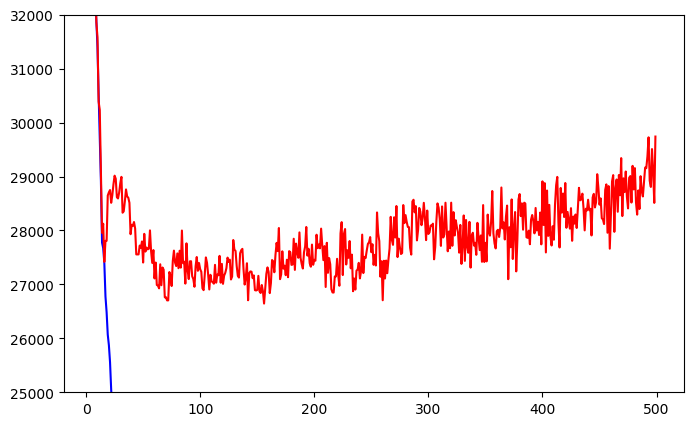

In [83]:
#MLN_plot_range = [2,1+(n_nodes+1)//2]
MLN_plot_range = [5,500]
plt.plot(list(range(MLN_plot_range[0],MLN_plot_range[1])),train_mae_MLN[MLN_plot_range[0]:MLN_plot_range[1]],'b')
plt.plot(list(range(MLN_plot_range[0],MLN_plot_range[1])),val_mae_MLN[MLN_plot_range[0]:MLN_plot_range[1]],'r')
plt.ylim([25000,32000])

# 6 Random Forests

Gains from hyperparameter tuning on decision trees were small. Might we do better with a change of model?

## Introduction

One major problem with our decision tree is its high sensitivity to the specific set of data used to train it.

What if we instead build more than one tree, training each tree with a different dataset, and have them average their predictions?

This idea leverages the concept of ensemble models, and it gave rise to the random forest predictive model.



References

1.
Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.
https://www.stat.berkeley.edu/users/breiman/randomforest2001.pdf

2.
P. Geurts, D. Ernst., and L. Wehenkel, “Extremely randomized trees”, Machine Learning, 63(1), 3-42, 2006.
https://link.springer.com/content/pdf/10.1007/s10994-006-6226-1.pdf

But we only have one dataset. How can we train multiple trees with different datasets?

Answer: Bootstrap Aggregation (Bagging)

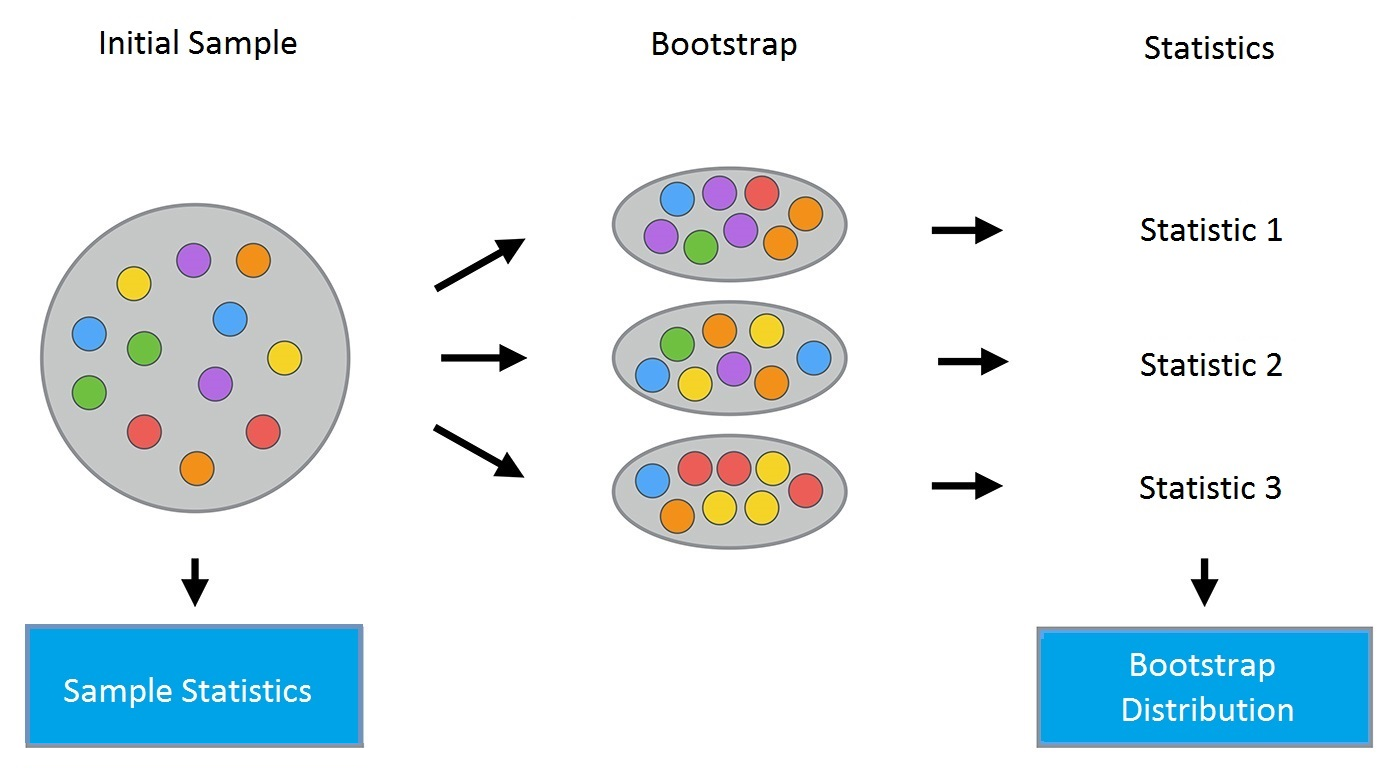

In [84]:
Image('bagging___kashnitsky.png')

In [ ]:
# https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging
# https://mlcourse.ai/
# Yury Kashnitsky

In [85]:
# Bootstrap sample 26 uppercase letters from the English alphabet:
np.random.seed(1234)
for _ in range(5):
    print(' '.join([chr(x) for x in np.random.randint(65,91,26)]))
    print()

P T G V M U Y Z P R X J L M W Y Q F Q J W P S Q M F

C G D H L A J L Q D C T M B L T L R O T H K L O R X

N U A M F R F Z Z U N Q J I Y M G Y W M T P R S V O

C F N G H E D F O P W U W P P C K E S H Z X L O X S

Z X U J A Z C Z B S Z R V H E X H R U A V U J S J B



## Example

In [86]:
# Define the random forest model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print("Validation MAE for Random Forest Model: %.2f"%(rf_val_mae))

Validation MAE for Random Forest Model: 21857.16


In [87]:
# Huge improvement over the tuned tree model !

Random forests often work quite well right out of the box, but you can tune them too.

Another source of randomness available in this algorithm (and also in decision trees): features get shuffled before every split. At any branch, if more than one split offers the same MSE improvement, the algorithm chooses one based on shuffling the features. That won't matter near the root of a decision tree, but it will affect nodes near the leaves whenever multiple features offer identical splits between the few remaining samples.

Random forests combine this shuffling with an option to downselect among the features considered at each split. Downselection can be performed randomly with the max_features parameter. 

Our dataset has just seven features, so let's try all seven:

In [88]:
# Modified get_mae helper function:
def get_mae(train_X, val_X, train_y, val_y, model_func, **kwargs):
    model = model_func(**kwargs)
    model.fit(train_X,train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [89]:
arr_max_features = [1,2,3,4,5,6,7]
mtx_mae = pd.DataFrame(index=arr_max_features,columns=['run%d'%r for r in range(100)])

for r in range(100):
    if (not(r%10)):
        print(r)
    mtx_mae['run'+str(r)] = pd.Series([ \
                get_mae(train_X,val_X,train_y,val_y,RandomForestRegressor,n_estimators=100,random_state=r,max_features=j) \
                for j in arr_max_features],index=arr_max_features)

0
10
20
30
40
50
60
70
80
90


In [90]:
mtx_mae

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,run10,run11,run12,run13,run14,run15,run16,run17,run18,run19,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29,run30,run31,run32,run33,run34,run35,run36,run37,run38,run39,run40,run41,run42,run43,run44,run45,run46,run47,run48,run49,run50,run51,run52,run53,run54,run55,run56,run57,run58,run59,run60,run61,run62,run63,run64,run65,run66,run67,run68,run69,run70,run71,run72,run73,run74,run75,run76,run77,run78,run79,run80,run81,run82,run83,run84,run85,run86,run87,run88,run89,run90,run91,run92,run93,run94,run95,run96,run97,run98,run99
1,23269.871476,23452.071128,23545.953517,23626.304740,23019.356986,23079.533059,23057.512887,22943.011731,23196.231656,22680.168849,23319.321298,23189.944389,23066.110283,23156.476849,23558.553584,23160.217571,23509.802701,23305.947823,23568.805731,23362.915930,23426.671131,23406.607425,23414.621466,23453.674968,23226.387419,23575.492227,23233.656472,23053.571704,23176.168363,23397.000817,23345.181224,23417.396360,23385.653482,23235.051699,23375.748586,23375.594744,23510.890351,23575.720217,22914.190072,23208.594368,23602.298504,22768.701965,22996.160009,23391.835461,23856.045826,23173.385030,23248.640355,23590.041555,23689.723948,23504.038501,23230.922403,23092.562373,22802.556654,23094.024141,23406.457727,23260.802864,23031.527168,23186.496438,23058.413320,23286.935050,23752.474836,23659.428779,23345.883924,23240.903830,23120.305907,23370.364352,23296.408393,23153.619571,23105.058146,23090.276968,23724.537576,22896.612932,23578.214848,23670.037873,23117.735763,23357.264311,22751.887059,23773.516461,23046.390617,23728.808612,23542.141593,23356.966958,23624.062000,23143.499425,23140.825195,23352.399774,23062.433408,23757.324170,23472.409430,23282.215936,23125.093198,23179.658738,23681.473151,23638.209429,23161.276535,23761.224066,23347.379769,22943.672107,23251.180798,23550.709624
2,22267.005489,22259.664508,22298.905627,22307.972588,22286.291348,22630.818690,22377.390650,22933.670180,22399.600384,22313.235689,22216.912454,22556.834521,22780.135507,22247.325802,22232.491977,22635.312865,22270.116998,22231.220420,22217.572561,22449.083451,22456.862712,22273.130898,22435.012247,22286.996548,22378.592570,22581.048194,22154.575304,22355.421204,22413.346470,22335.670279,22445.745104,22351.809278,22942.937705,22443.513502,22275.077198,22597.884569,22372.201983,22659.672000,22423.969498,22565.763903,22898.479134,22284.908167,22253.573123,22247.378162,22827.733772,22107.416327,22363.773165,22161.987260,22401.684426,22342.789156,22768.172378,22062.003926,22459.865262,22565.353076,22356.648560,22373.416864,22391.225132,22252.037966,22433.632930,22338.324960,22371.120810,22442.565551,22090.724210,22855.788461,22382.975606,22268.575142,22426.333845,22230.202534,22450.750985,22481.331950,22338.065571,22229.506432,22724.555448,22875.163447,22477.500995,22186.347800,22186.331149,23052.381350,21920.425689,22307.486201,22437.591353,22519.716532,22581.518269,22877.405858,22574.245070,22599.616299,22346.605950,22440.432147,22800.170347,22372.997599,22232.328176,22350.776975,22385.679840,22597.789045,22737.261096,22307.151553,22262.856445,22408.930539,22706.023904,22469.940207
3,21667.938434,21991.665607,22431.214270,21871.997781,21817.094805,22304.916583,22148.762187,22341.610614,22012.014843,22046.664496,21965.016174,22146.842521,22065.766127,21929.888874,22190.489804,22131.895833,22224.649251,22275.221840,22030.259502,22106.301333,21919.753380,22206.065954,22006.917249,22193.913078,21884.556196,22130.073492,21907.300641,22349.485507,21839.390504,22153.295877,22157.245356,21826.557732,22282.694731,22048.127842,21972.514069,22090.107527,22328.091515,21841.293023,21811.309286,22083.123932,22138.508668,22005.565832,22024.786526,22145.214377,22008.705970,21435.679273,21951.984417,22023.369726,22052.622326,22224.967780,22028.544368,22178.817626,22110.993493,22023.948100,22060.848532,22104.060093,21815.483320,21804.316369,22003.946584,21863.383759,22019.024187,21831.9064

In [91]:
# MAE of 21857 was a fortunate result.

In [92]:
rf_tuning_results = pd.concat([mtx_mae.mean(axis=1),mtx_mae.std(axis=1)],axis=1)
rf_tuning_results.columns=['mean','std']
rf_tuning_results

,mean,std
1,23312.014406,254.231388
2,22428.583670,214.737992
3,22075.415238,181.110576
4,21976.235973,194.293125
5,22043.773440,182.024950
6,22116.706018,188.298887
7,22203.152752,182.309598


Tuning result: optimal value for max_features is 4